# Parameter identification example

Here is a simple toy model that we use to demonstrate the working of the inference package

$\emptyset \xrightarrow[]{k_1} X \; \; \; \; X \xrightarrow[]{d_1} \emptyset$

### Run the MCMC algorithm to identify parameters from the experimental data 

C:\Users\apand\AppData\Local\Continuum\anaconda3\lib\site-packages\emcee\moves\red_blue.py:97: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


Successfully completed MCMC parameter identification procedure. Parameter distribution data written to mcmc_results.csv file


UnboundLocalError: local variable 'params_names' referenced before assignment

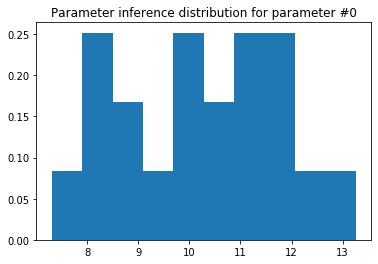

In [1]:
%matplotlib inline
import bioscrape as bs
from bioscrape.types import Model
from bioscrape.simulator import py_simulate_model
from bioscrape.pid_interfaces import *
from bioscrape.emcee_interface import *
import numpy as np
import pylab as plt
import pandas as pd

pid = initialize_mcmc()
# Import bioscrape XML / bioscrape model object M / SBML file
# M  = bs.types.read_model_from_sbml(filename)
pid.M = Model('models/toy_model.xml')


# Import data from CSV
# Import a CSV file for each experiment run
pid.exp_data = pd.read_csv('test_data.csv', delimiter = '\t', names = ['X','time'], skiprows = 1)
# data_list.append(list(data.get('X')))
# pid.exp_data = np.array(data_list)
pid.measurements = ['X']
pid.time_column = ['time']
pid.prior = {'k1' : ['uniform', 10, 100, 1e-7],'d1' : ['gaussian', 0.2, 1, 1e-5]}
pid.params_to_estimate = ['k1', 'd1']
pid.nwalkers = 20

pid.init_seed = 0.15
pid.type = 'deterministic'


fitted_model, params = pid.run_mcmc(plot_show = True)

### Check mcmc_results.csv for the results of the MCMC procedure and perform your own analysis.

### You can also plot the results as follows

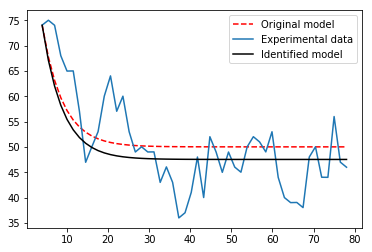

In [2]:
timepoints = pid.timepoints
M_original = Model('models/toy_model.xml')
sim_x = py_simulate_model(timepoints, Model = M_original, stochastic = False)
sim_x_inf = py_simulate_model(timepoints, Model = fitted_model, stochastic = False)
plt.plot(timepoints, sim_x['X'], 'r--', label = 'Original model')
plt.plot(timepoints, pid.exp_data.get('X'), label = 'Experimental data')
plt.plot(timepoints, sim_x_inf['X'], 'k', label = 'Identified model')

plt.legend()

## Alll methods above have other advanced options that you can use. Refer to Parameter Identification Tools and Advanced Examples notebook for more details. There are many other tools available such as for multiple initial conditions and timepoints for each trajectory, options for the estimator etc.

In [3]:
fitted_model.get_parameter_values()

array([0.20009729, 9.5081574 ])

In [2]:
pid.exp_data

,X,time
0,71.999673,4.000000
1,63.048092,4.918367
2,60.009484,5.836735
3,62.021921,6.755102
4,57.028625,7.673469
5,55.046796,8.591837
6,60.990691,9.510204
7,56.001016,10.428571
8,54.000635,11.346939
9,54.966352,12.265306
